# Libraries import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
import cv2 as cv

# Data import

In [4]:
mountain_img = cv.imread('mountains.jpg', cv.IMREAD_COLOR_RGB)

# Data Visualize

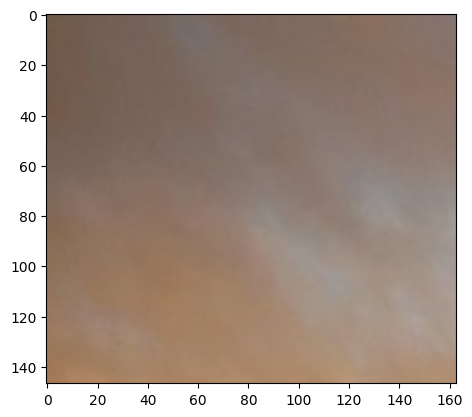

In [5]:
plt.imshow(mountain_img)

# Data Preprocessing

In [6]:
mountain_img_scaled = mountain_img /255

In [7]:
mountain_img_scaled.shape

(147, 163, 3)

In [8]:
PIXELS_LIST_SHAPE = (mountain_img_scaled.shape[0] * mountain_img_scaled.shape[1], mountain_img_scaled.shape[2])

mountain_img_pixels = mountain_img_scaled.reshape( PIXELS_LIST_SHAPE)
mountain_img_pixels.shape

(23961, 3)

# K-means

In [9]:
N_CLUSTERS = 5
RANDOM_STATE = 41

In [10]:
kmeans_img = KMeans(
    n_clusters=N_CLUSTERS,
    random_state=RANDOM_STATE,
)

In [11]:
mountain_img_scaled.shape

(147, 163, 3)

In [12]:
kmeans_img.fit(mountain_img_pixels)

c:\Users\yosef\anaconda3\envs\my-env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\yosef\anaconda3\envs\my-env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\yosef\anaconda3\envs\my-env\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\yosef\anaconda3\envs\my-env\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\yosef\anaconda3\envs\my-env\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

KMeans(n_clusters=5, random_state=41)

In [13]:
mountain_img_pixels_cluters =  kmeans_img.predict(mountain_img_pixels)

In [14]:
mountain_img_pixels_cluters

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [15]:
mountain_img_pixels_tuned = kmeans_img.cluster_centers_[ mountain_img_pixels_cluters, : ]

In [16]:
mountain_img_pixels_tuned

array([[0.46236313, 0.38653447, 0.3415121 ],
       [0.46236313, 0.38653447, 0.3415121 ],
       [0.46236313, 0.38653447, 0.3415121 ],
       ...,
       [0.64084672, 0.5734419 , 0.5243069 ],
       [0.64084672, 0.5734419 , 0.5243069 ],
       [0.64084672, 0.5734419 , 0.5243069 ]])

In [17]:
mountain_img_tuned = mountain_img_pixels_tuned.reshape(mountain_img_scaled.shape)

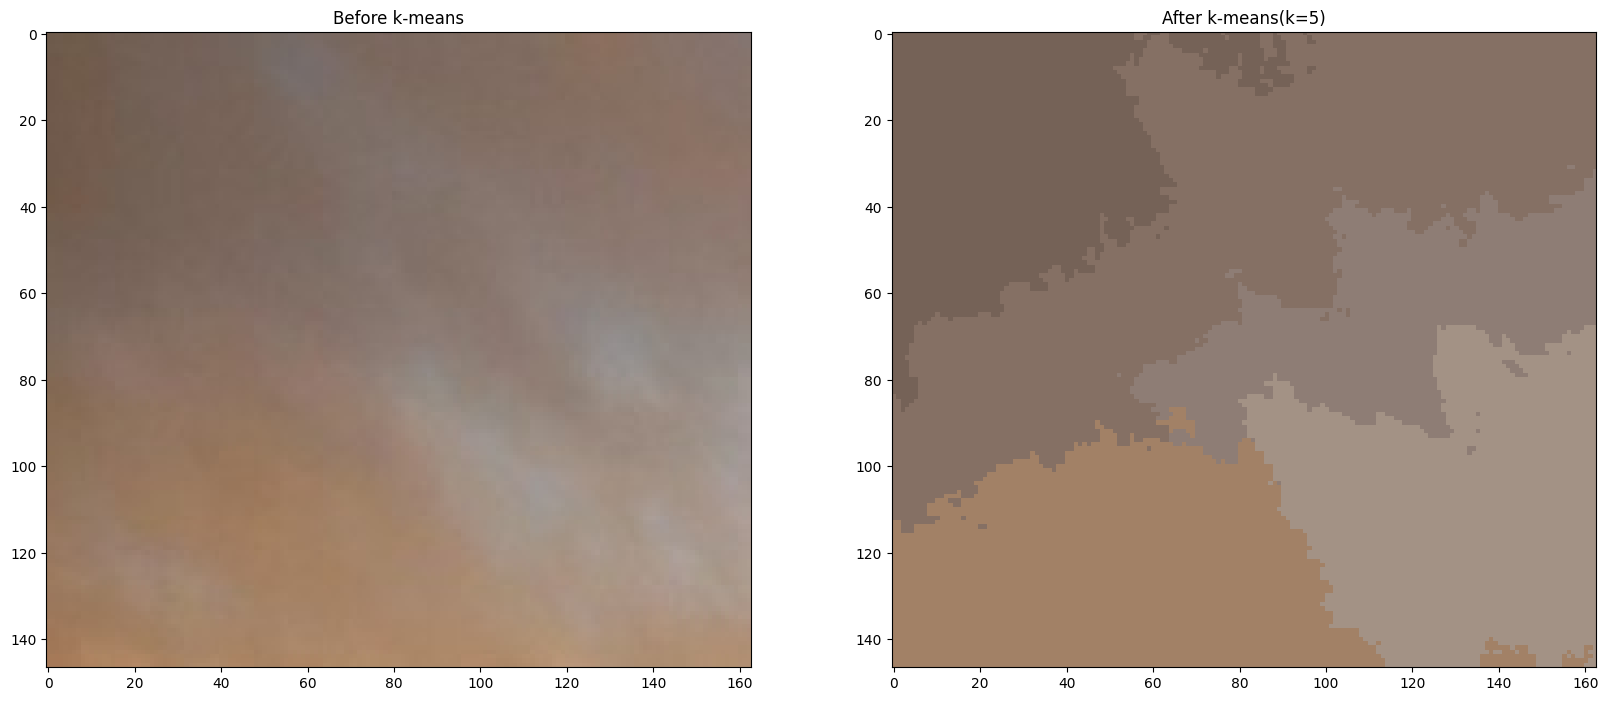

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Before k-means')
plt.imshow(mountain_img_scaled)

plt.subplot(1,2,2)
plt.title(f'After k-means(k={N_CLUSTERS})')
plt.imshow(mountain_img_tuned)

# DBSCAN

In [141]:
EPSILON = 0.005
MIN_SAMPLES = 5
SAMPLE_FACTOR = 1

In [142]:
dbscan_img = DBSCAN(
    eps=EPSILON,
    min_samples=MIN_SAMPLES,
)

In [143]:
mountain_img_pixels_cluters_2 =  dbscan_img.fit_predict(mountain_img_pixels[::SAMPLE_FACTOR])

In [144]:
mountain_img_pixels_cluters_2 = np.repeat(mountain_img_pixels_cluters_2, SAMPLE_FACTOR  )

Replace outliers with cluster no 0

In [145]:
mountain_img_pixels_cluters_2[ mountain_img_pixels_cluters_2 == -1 ] = 0

In [146]:
unique_clusters = np.unique(mountain_img_pixels_cluters_2)

mountain_img_pixels_tuned_2 = np.copy(mountain_img_pixels)

for cluster_no in unique_clusters:
    bool_cond = mountain_img_pixels_cluters_2 ==  cluster_no 
    color = np.mean(mountain_img_pixels[bool_cond ], axis=0)
    mountain_img_pixels_tuned_2[ bool_cond ] = color


In [147]:
mountain_img_tuned_2 = mountain_img_pixels_tuned_2.reshape(mountain_img_scaled.shape)

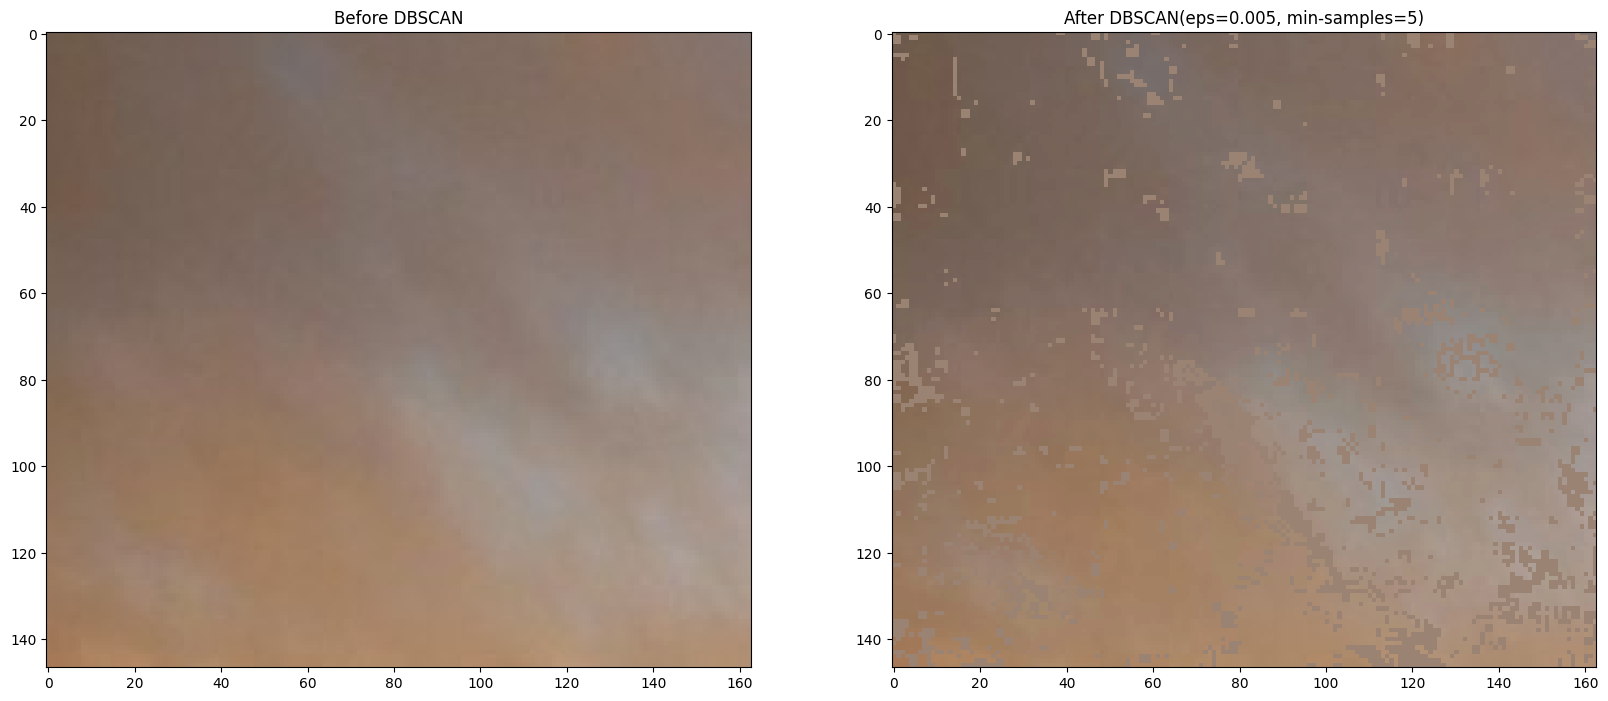

In [148]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Before DBSCAN')
plt.imshow(mountain_img_scaled)

plt.subplot(1,2,2)
plt.title(f'After DBSCAN(eps={EPSILON}, min-samples={MIN_SAMPLES})')
plt.imshow(mountain_img_tuned_2)